# Description: 
consider the following 50 start-ups which consists various attributes 
– administration, marketing spend, state, profit etc. Import the dataset from the 
url and apply multi linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# PROBLEM DESCRIPTION:
We have a dataset of 50 start-up companies. This dataset contains five main informationS: R&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year. Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.

Since we need to find the Profit, so it is the dependent variable, and the remaining four variables are independent variables.

# Below are the main steps of deploying the model:
    
1)Data Pre-processing Steps

2)Fitting the model to the training set

3)Predicting the result of the test set

In [3]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

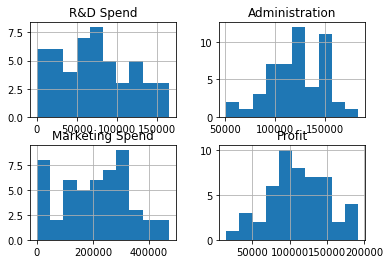

In [7]:
data.hist()

# Scatter Plot
Scatter plots are used to observe relationships between variables and uses dots to represent the relationship between them. The scatter() method in the matplotlib library is used to draw a scatter plot.

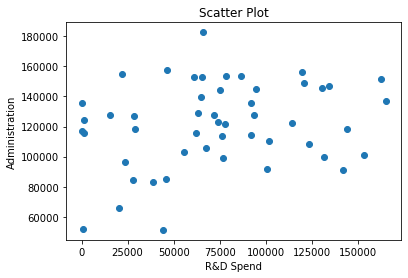

In [19]:
plt.scatter(data['R&D Spend'], data['Administration'])
plt.title("Scatter Plot")
plt.xlabel('R&D Spend')
plt.ylabel('Administration')
plt.show()

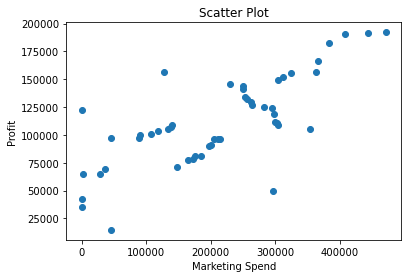

In [21]:
plt.scatter(data['Marketing Spend'], data['Profit'])
plt.title("Scatter Plot")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

# Line Chart
Line Chart is used to represent a relationship between two data X and Y on a different axis. It is plotted using the plot() function.

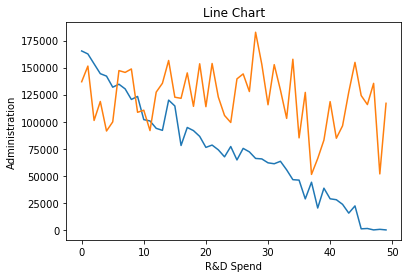

In [22]:
plt.plot(data['R&D Spend'])
plt.plot(data['Administration'])
plt.title("Line Chart")
plt.xlabel('R&D Spend')
plt.ylabel('Administration')
  
plt.show()

In [4]:
import seaborn as sns

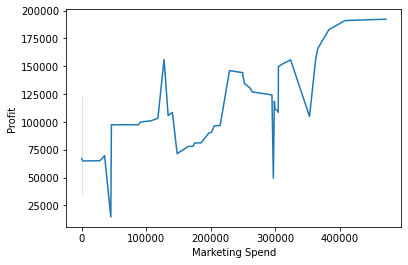

In [28]:
sns.lineplot(x="Marketing Spend", y="Profit", data=data)
plt.title('')
plt.show()

# Encoding Dummy Variables:

As we have one categorical variable (State), which cannot be directly applied to the model, so we will encode it. 
To encode the categorical variable into numbers, we will use the LabelEncoder class.

In [8]:
from sklearn.preprocessing import LabelEncoder
data["State"] = LabelEncoder().fit_transform(data["State"])

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, 4]

In [10]:
states=pd.get_dummies(X['State'],drop_first=True)

In [11]:
X=pd.concat([X,states],axis=1)

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Multiple Linear Regression:
Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent 
continuous variable and more than one independent variable.


In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
regressor.score(X_test,y_test)

0.9347068473282424